In [1]:
import pandas as pd
import pyarrow.parquet as pq
import airportsdata 

In [7]:
# Sample data
df = pd.DataFrame({'origin_airport': ['A', 'B', 'C', 'D', 'E'],
                   'destination_airport': ['X', 'Y', 'Z', 'X', 'Y']})
df_stopover = pd.DataFrame({'origin_a': ['A','A', 'B', 'C', 'D', 'E'],
                  'destination_a': ['B','X', 'Y', 'Z', 'X', 'Y']})

# Merge DataFrames A and df based on 'origin_a' and 'destination_a' columns
merged_df = pd.merge(df_stopover, df, left_on=['origin_a', 'destination_a'], right_on=['origin_airport', 'destination_airport'], how='inner')

# Check if any rows are returned after the merge
merged_df

,origin_a,destination_a,origin_airport,destination_airport
0,A,X,A,X
1,B,Y,B,Y
2,C,Z,C,Z
3,D,X,D,X
4,E,Y,E,Y


### Data Collection

In [6]:
airports = airportsdata.load()
# edinburgh = airports['EGPH']
# glasgow = airports['EGPF']
# prestwick = airports['EGPK']

In [7]:
dataset = pq.ParquetDataset('c:\\Users\\lukas\\OneDrive - Imperial College London\\0_Sustainable Transport\\2021_COP26',
                            ) # filters=[('columnName', 'in', filterList)]
df = dataset.read(use_threads=True).to_pandas()

In [8]:
df.columns

Index(['callsign', 'icao_address', 'flight_number', 'tail_number',
       'aircraft_type_icao', 'aircraft_engine_type', 'origin_airport',
       'origin_airport_name', 'origin_country', 'destination_airport',
       'destination_airport_name', 'destination_country',
       'scheduled_departure_time_utc', 'scheduled_arrival_time_utc',
       'first_waypoint_time', 'last_waypoint_time', 'duration_hours',
       'total_distance_km', 'great_circle_distance_km',
       'longitude_first_waypoint', 'longitude_last_waypoint', 'longitude_min',
       'longitude_max', 'latitude_first_waypoint', 'latitude_last_waypoint',
       'latitude_min', 'latitude_max', 'altitude_first_waypoint',
       'altitude_last_waypoint', 'altitude_min', 'altitude_max', 'n_wypts',
       'n_terrestrial', 'n_satellites', 'n_interpolate', 'n_extrapolate',
       'n_great_circle', 'extrap_trajectory_start', 'extrap_trajectory_end',
       'trajectory_complete', 'great_circle_trajectory', 'est_origin_airport',
       'es

In [9]:
# Filter by airports to and from Glasgow/Edinburgh
# Airport in Glasgow: Glasgow airport (EGPF), Prestwick airport(EGPK)
# Airport in Edinburgh: Edinburgh airport (EGPH)

cop_airports = ['EGPF','EGPK','EGPH']
data_cop = df[df['destination_airport'].isin(cop_airports) ]# | df['origin_airport'].isin(cop_airports) #negative isin with ~df[column].isin(filter)

In [10]:
data_cop = data_cop[['callsign', 'icao_address', 'flight_number', 'tail_number',
       'aircraft_type_icao', 'origin_airport',
       'origin_airport_name', 'origin_country', 'destination_airport',
       'destination_airport_name', 'destination_country',
       'scheduled_departure_time_utc', 'scheduled_arrival_time_utc',
       'first_waypoint_time', 'last_waypoint_time', 'duration_hours',
       'total_distance_km', 'longitude_first_waypoint', 'longitude_last_waypoint', 'latitude_first_waypoint', 'latitude_last_waypoint',
       'flight_id']]

### COP26 - Glasgow

### Data visualisation

In [11]:
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

##### Heatmap

Two weeks before COP26

In [12]:
start_date = pd.to_datetime('2021-10-12')
end_date = pd.to_datetime('2021-10-28')

data_before = data_cop[data_cop['scheduled_arrival_time_utc'].dt.date >= start_date.date()]
data_before = data_before[data_before['scheduled_departure_time_utc'].dt.date <= end_date.date()]

In [13]:
basemap = folium.Map()
FastMarkerCluster(data_before[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
HeatMap(data_before[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
basemap

Two weeks after COP26

In [14]:
start_date = pd.to_datetime('2021-11-15')
end_date = pd.to_datetime('2021-11-30')

data_after = data_cop[data_cop['scheduled_arrival_time_utc'].dt.date >= start_date.date()]
data_after = data_after[data_after['scheduled_departure_time_utc'].dt.date <= end_date.date()]

In [50]:
basemap = folium.Map()
FastMarkerCluster(data_after[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
HeatMap(data_after[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
basemap

##### COP26

In [51]:
# Filter by cop26 duration (31.10 - 13.10.2021)
start_date = pd.to_datetime('2021-10-29')
end_date = pd.to_datetime('2021-11-13')

data_cop_filtered = data_cop[data_cop['scheduled_arrival_time_utc'].dt.date >= start_date.date()]
data_cop_filtered = data_cop[data_cop['scheduled_departure_time_utc'].dt.date <= end_date.date()]
# data_cop[data_cop['flight_number'] == 'LS168']#.scheduled_departure_time_utc

In [52]:
basemap = folium.Map()
FastMarkerCluster(data_cop_filtered[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
HeatMap(data_cop_filtered[['latitude_first_waypoint', 'longitude_first_waypoint']]).add_to(basemap)
basemap

##### Plots (Arrival of flights over time, Load capacity over time, CO2 emissions)

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

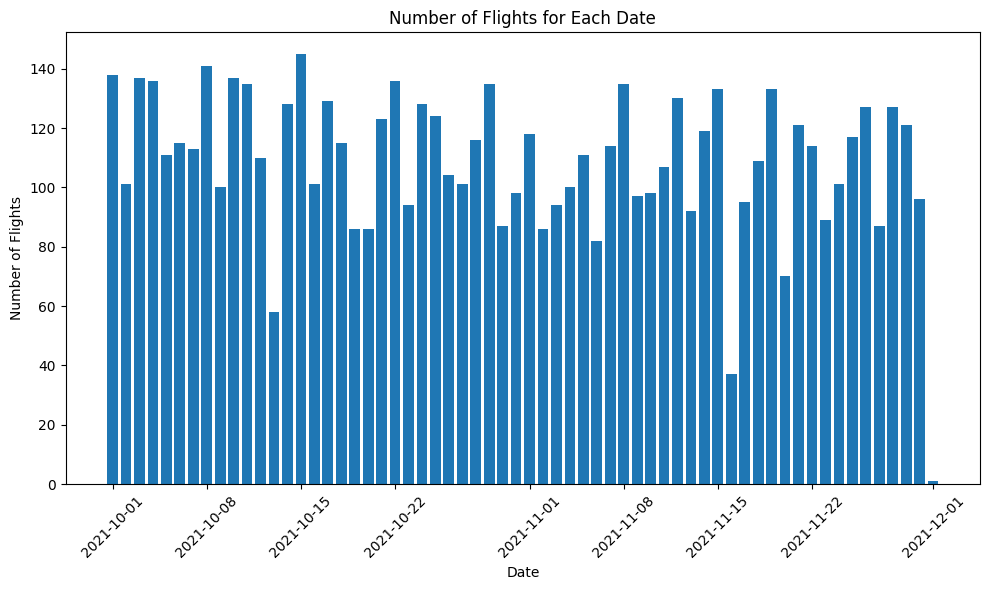

In [61]:
# x-axis time
# y-axis number of flights over 2 month period

# Group DataFrame by date and count the number of rows for each date
date_counts = data_cop.groupby(data_cop['scheduled_arrival_time_utc'].dt.date).size()
# date_counts = df.groupby(df['scheduled_arrival_time_utc'].dt.date).size()
# date_counts = data_cop_filtered.groupby(data_cop_filtered['scheduled_arrival_time_utc'].dt.date).size()

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(date_counts.index, date_counts.values)  # Plot a bar chart
plt.title('Number of Flights for Each Date')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Number of Flights')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot


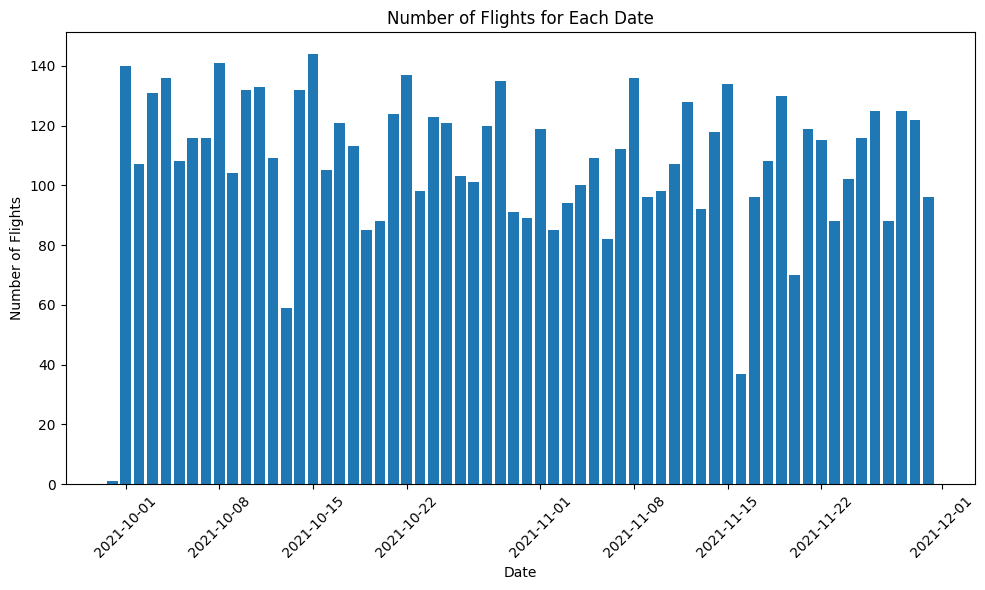

In [62]:

# Group DataFrame by date and count the number of rows for each date
date_counts = df.groupby(data_cop['scheduled_departure_time_utc'].dt.date).size()

# Plot the data
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(date_counts.index, date_counts.values)  # Plot a bar chart
plt.title('Number of Flights for Each Date')  # Set the title
plt.xlabel('Date')  # Set the x-axis label
plt.ylabel('Number of Flights')  # Set the y-axis label
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Show the plot